|Item|Description|
|:---|:---|
|Created |Jan 14, 2021|
|Author|BIMALKA PIYARUWAN|
|GitHub|https://github.com/bimalka98|

# Edge Detection

1. If we directly apply the gradient kernel, it amplifies the noise.
2. Therefore the we need to smooth the image to reduce the noise and then we can take the gradient.
3. If the image is $I(x,y)$, and Gaussian $G(u,v)$ be the circularly symmetric smoothing filter.

## Steps
1. Convolve the image with the Gaussian kernel. $I(x,y) * G(u,v)$ to get a smoothed image.
2. Then apply the gradient operator.Here I have used Sobel Vertical Kernel and Sobel Horizontal Kernel to calculate $I(x,y)_{x}$ and $I(x,y)_{y}$ respectively. 
3. Then the $|Grad~I(x,y)| = \sqrt{{I_{x}}^{2} + {I_{y}}^{2}} $
4. Additionally the effect of the Laplacian $\nabla^{2}$ is also given. 

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

(512, 512)


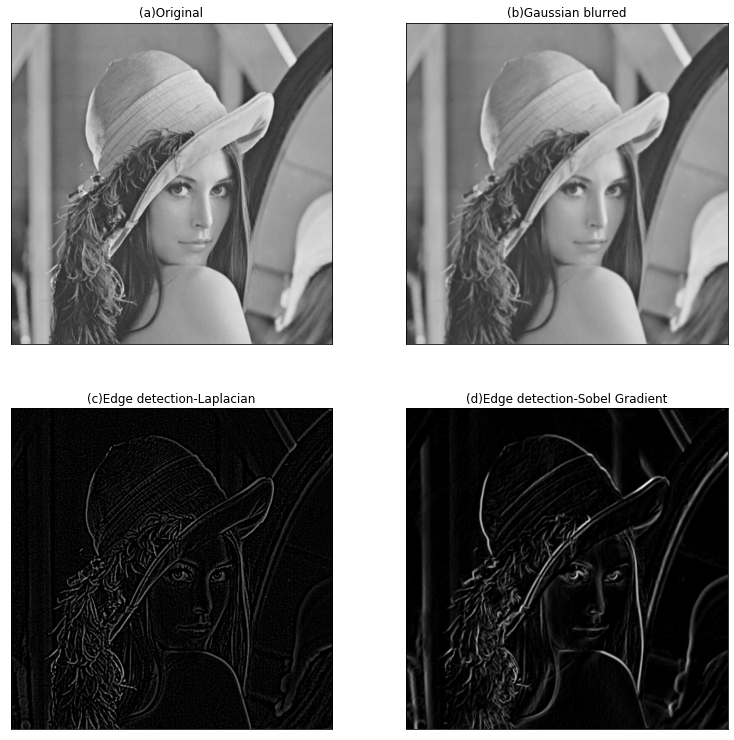

In [2]:
orgimg = cv.imread('..\PracticeCV\Lenna.png', cv.IMREAD_GRAYSCALE)
print(orgimg.shape)

'''***********************************************************************'''
#Generating the Gaussian Kernel
kernel_dim = 5 # dimension of the kernel
sigma = 1 # standard deviation
gaussian = cv.getGaussianKernel(kernel_dim, sigma)
smoothed_img = cv.sepFilter2D(orgimg, -1, gaussian, gaussian) #Gaussian smoothing

'''***********************************************************************'''
# Declaring sobel vertical and horizontal kernels - 1st derivative operator
sobel_vertical_kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float') #central differnce in vertical---> sobel vertical kernel
sobel_horizontal_kernel = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype='float') #central differnce in horizontal---> sobel horizontal kernel

# Calculating gradient of the original image using soble operators
img_hor_edges = cv.filter2D(smoothed_img,-1,sobel_vertical_kernel) # Horizontal edges are detcted by verical kernel--I_x
img_ver_edges = cv.filter2D(smoothed_img,-1,sobel_horizontal_kernel) # Vertical edges are detected by horizontal kernel--I_y
# -1 is the desired depth of the img

#calculate the gradient magnitude of vectors
# |grad(sobel Output)| = sqrt(g_x**2 + g_y**2) (img_hor_edges*img_hor_edges+img_ver_edges*img_ver_edges)
sobel_out = np.sqrt(np.power(img_hor_edges, 2*np.ones(img_hor_edges.shape)) + np.power(img_ver_edges, 2*np.ones(img_ver_edges.shape)))
# mapping values from 0 to 255
sobel_out = ((sobel_out / np.max(sobel_out)) * 255).astype('uint8')

# Gamma corection  
gamma = 1
LUT = np.array([(i/255.0)**(1.0/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
sobel_out = cv.LUT(sobel_out, LUT)

# |grad| = sqrt(g_x**2 + g_y**2) nearly equal to |g_x|+|g_y| therefore following method is also used.
#sobel_out = cv.addWeighted(img_hor_edges , 1.0,img_ver_edges , 1, 0) #Opencv addition is used because numpy addition saturates.

'''***********************************************************************'''
#Generating the laplacian kernels - 2nd derivative operator
laplacian = np.array([(-1,-1,-1),(-1,8,-1),(-1,-1,-1)]) # Able to capture diagonal transitions too therfore-more filtering effect
laplacin_edges = cv.filter2D(smoothed_img, -1, laplacian)

# Gamma corection  
gamma = 1.5
LUT = np.array([(i/255.0)**(1.0/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
laplacin_edges = cv.LUT(laplacin_edges, LUT)

'''***********************************************************************'''
# Plotting
fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(13,13))
img_dict = {'(a)Original':orgimg, '(b)Gaussian blurred': smoothed_img,'(c)Edge detection-Laplacian':laplacin_edges,'(d)Edge detection-Sobel Gradient':sobel_out}
i =0
for key in img_dict.keys():
    plt.subplot(2,2,i+1),plt.imshow(img_dict[key], cmap='gray', vmin = 0, vmax = 255)
    plt.title(key),plt.xticks([]),plt.yticks([])
    i+=1
plt.show()

## or else
Since the Convolution and the Differentiation(gradient) are linear operators we can interchange the order of applying.

1. Find the Laplacian
of the Gaussian kernel. $\nabla^{2}{G(u,v)}$
2. Convolve the resultant kernel with the image.$I(x,y)*{\nabla^{2}{G(u,v)}}$

0.9999999863610616


NameError: name 'Z' is not defined

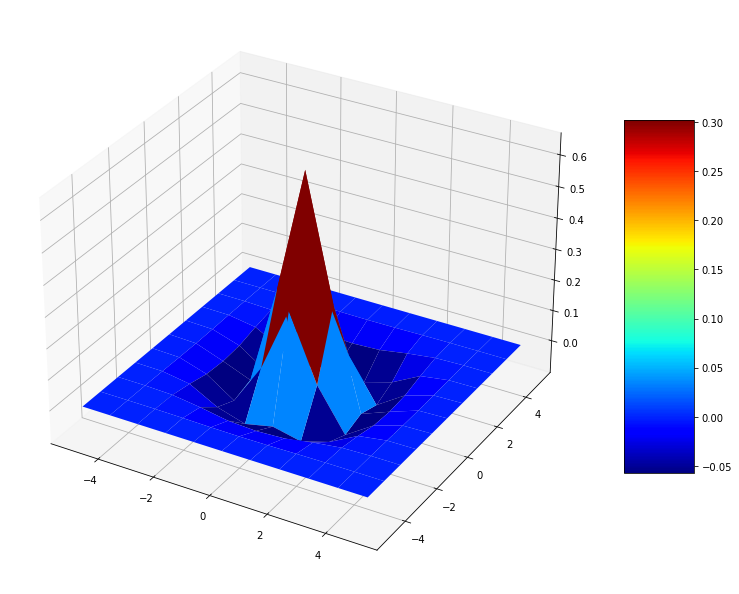

In [3]:
#Generating the 2D Gaussian Kernel
dim_of_kernel = 11 # dimension 0f the kernel = 11*11
max_abs = np.floor(dim_of_kernel/2)
x_range = np.arange(-max_abs,max_abs +1,1) #(form -5 to +5 range)
y_range = np.arange(-max_abs,max_abs +1,1) #(form -5 to +5 range)
X,Y = np.meshgrid(x_range, y_range)

sigma = 1 # standard deviation of the distribution
gaussian = np.exp((-(X**2 + Y**2))/(2*sigma**2))/(2*np.pi*sigma**2) # Gaussian function
print(sum(sum(gaussian)))

laplacian = np.array([(-1,-1,-1),(-1,8,-1),(-1,-1,-1)])
LoG = cv.filter2D(gaussian,-1,laplacian) # Lapalacian of Gaussian
#print(LoG)

'''***********************************************************************'''
# Plotting
from matplotlib import cm
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection ='3d')
surf = ax.plot_surface(X,Y,LoG, cmap = cm.jet, linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
cset = ax.contourf(X, Y, LoG, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(LoG) - 2, np.max(LoG))

In [ ]:
lap_of_gaussian = cv.filter2D(orgimg, -1, LoG)

# Gamma corection  
gamma = 1.5
LUT = np.array([(i/255.0)**(1.0/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
lap_of_gaussian = cv.LUT(lap_of_gaussian, LUT)

# Plotting
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(13,13))
axes[0].imshow(orgimg, cmap='gray', vmin = 0, vmax = 255)
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(lap_of_gaussian, cmap='gray', vmin = 0, vmax = 255)
axes[1].set_title('Edges by Laplacian Of Gaussian')
axes[1].set_xticks([]), axes[1].set_yticks([])